In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime
import numpy as np
import seaborn as sns
%matplotlib inline

movies = pd.read_csv('2013_movies.csv')
col_names = movies.columns
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Challenge 1

Plot domestic total gross over time.

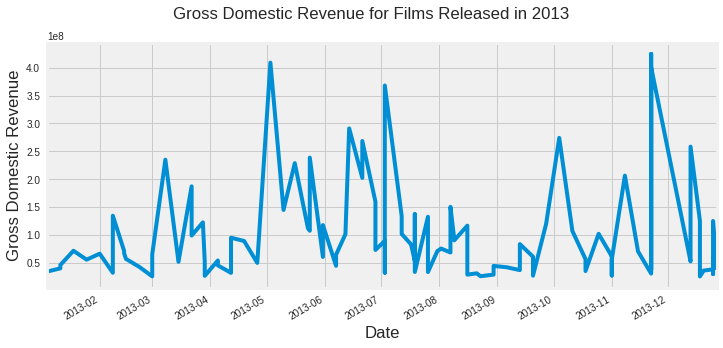

In [4]:
#TODO: adjust xticks
movies['Date'] = movies['ReleaseDate'].map(lambda x : parse(x))

plt.figure(figsize=(12,5))
plt.style.use("fivethirtyeight")
plt.xlabel('Date')
plt.ylabel('Gross Domestic Revenue')
plt.suptitle('Gross Domestic Revenue for Films Released in 2013')
movies.set_index(['Date'])['DomesticTotalGross'].plot();

Challenge 2

Plot runtime vs. domestic total gross.

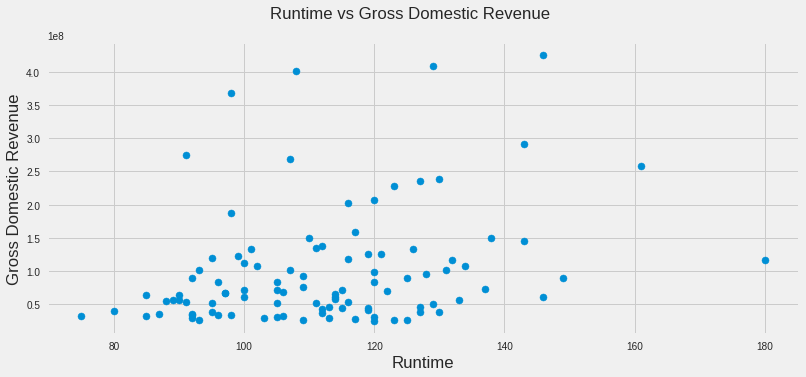

In [5]:
plt.figure(figsize=(12,5))
plt.style.use("fivethirtyeight")
plt.xlabel('Runtime')
plt.ylabel('Gross Domestic Revenue')
plt.suptitle('Runtime vs Gross Domestic Revenue')
plt.scatter(movies['Runtime'], movies['DomesticTotalGross']);


Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [6]:
grouped_rating = movies.groupby('Rating')
runtime_mean = grouped_rating['Runtime'].mean()
dtp_mean = grouped_rating['DomesticTotalGross'].mean()
print(runtime_mean)
print(dtp_mean)

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64
Rating
G        268492764
PG       131135716
PG-13    111449769
R         69892429
Name: DomesticTotalGross, dtype: int64


Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

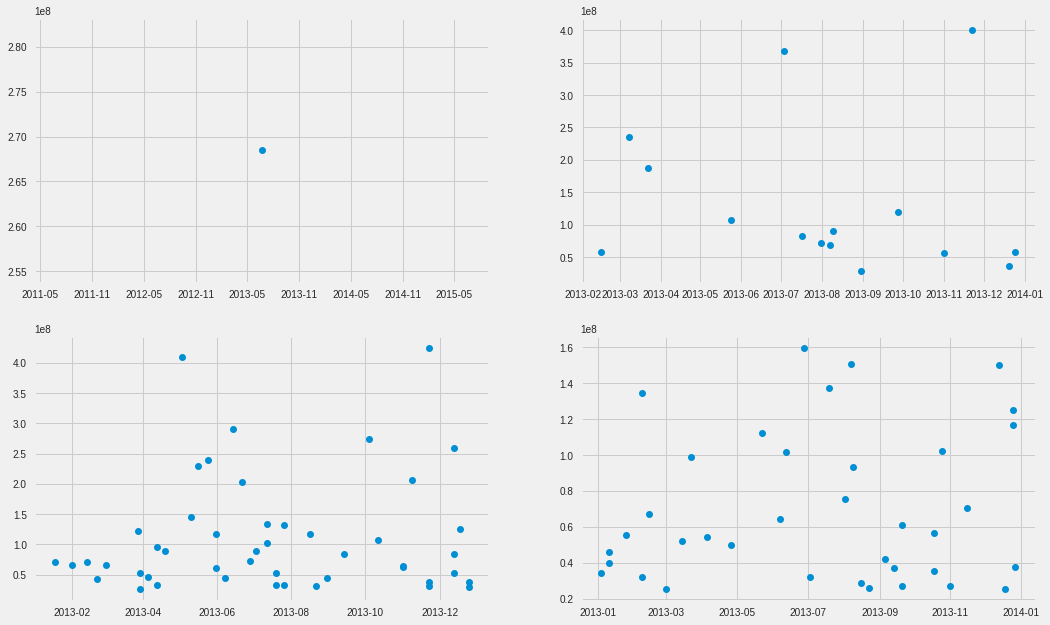

In [13]:
plt.figure(figsize=(16,10));

plt.subplot(221);
plt.plot_date(movies[movies['Rating']=='G']['ReleaseDate'], movies[movies['Rating']=='G']['DomesticTotalGross']);

plt.subplot(222);
plt.plot_date(movies[movies['Rating']=='PG']['ReleaseDate'], movies[movies['Rating']=='PG']['DomesticTotalGross']);

plt.subplot(223);
plt.plot_date(movies[movies['Rating']=='PG-13']['ReleaseDate'], movies[movies['Rating']=='PG-13']['DomesticTotalGross']);

plt.subplot(224);
plt.plot_date(movies[movies['Rating']=='R']['ReleaseDate'], movies[movies['Rating']=='R']['DomesticTotalGross']);

Challenge 5

What director in your dataset has the highest gross per movie?

In [130]:
director_meanby_film = movies.groupby('Director')['DomesticTotalGross'].mean()
print(director_meanby_film.idxmax())

Francis Lawrence


Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

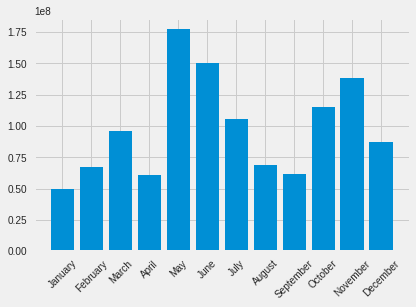

In [151]:
grouped_month = movies.groupby(movies['Date'].map(lambda x : x.month))['DomesticTotalGross'].mean()
index = np.arange(12)
xlabels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
plt.bar(index, grouped_month)
plt.xticks(index,xlabels, rotation = 45)
plt.show();